![](https://7612750.fs1.hubspotusercontent-na1.net/hubfs/7612750/logo%20Senpai_2022%20(1)-1.png)
# Proyecto final - Bootcamp Data Science

A continuación, se detallan las indicaciones para el desarrollo del proyecto final. 
Tenga a bien leer todas las instrucciones y no dude en consultar si tiene alguna duda.

1. El proyecto se realiza de forma grupal comenzando el 21 de Noviembre a las 7:00 PM. La defensa del mismo se realizará el día 1 de diciembre a las 7:00 PM. Como parte de la evaluación se ponderan tres conceptos, el desarrollo de la solución (Notebook), la defensa grupal y la presentación individual 

2. La fecha de entrega de trabajo es el 30 de Noviembre a las 9:00 AM horas 

3. Tanto el código como el análisis y las visualizaciones se deben entregan en un notebook en formato **.ipynb**

4. Puede utilizar diferentes herramientas para el desarrollo como Jupyter, Colab, Spypder o VSCodium, sin embargo, el trabajo final debe ser entregado en un notebook como estipulado en el punto 3.

5. Como parte del ejercicio, se podrán implementar todas las herramientas y code snippets vistos durante el transcurso del bootcamp.

6. Se deberan implementar funciones que reciban los parámetros adecuados y no posean strings implícitos dentro de la misma función.

7. Los trabajos deberán ser enviados por correo al cuerpo docente (1 por grupo).

8. Se deben de implementar visualizaciones, ya sea como parte del EDA y/o del entrenamiento del modelo

9. Se recomienda trabajar con Colab o Kaggle para el desarrollo del proyecto. Tenga en cuenta que cada servicio posee particularidades con las versiones de las librerías con las que opera.

10. Con el objetivo de poder registrar los experimentos y sus métricas, se recomienda utilizar soluciones de MLOps como Neptune, Tensorboard, o Comet.

---

## Datos del Grupo (Ingrese los datos de los miembros del grupo)

Nombre  | Apellido
--------|----------
Alumno  | 1
Alumno  | 2
Alumno  | 3


## Criterio de evaluación

Cada grupo deberá proponer al menos dos temas los cuales serán evaluados por los docentes en base a los siguientes parámetros:

- Complejidad
- Usabilidad
- Aplicabilidad
- Innovador

Una vez que el cuerpo docente haya dado la aprobación de uno de los temas propuestos por el equipo, el mismo deberá comenzar con el desarrollo del modelo predictivo aplicando los conocimientos vistos a través del bootcamp.

Como parte del examen se evaluarán los siguientes conceptos:

* Importar datos desde fuentes externas
* Uso de funciones
* Documentación
* Limpieza de datos
* Gestión de datos y transformaciones
* Visualizaciones
* Selección de atributos
* Reducción de dimensionalidad donde sea neceario
* Modelado
* Evaluación de los resultados (métricas)
* Almacenamiento de resultados y modelo


Tenga en cuenta que el desarrollo no solo debe contar con la documentación de código como parte de las buenas prácticas, sino que también se debe documentar los diferentes resultados parciales con su debida explicación, así como la conclusión con los datos que soporten los resultados

## Herramientas utilizadas

A continuación tenga a bien detallar las herramientas utilizadas para el desarrollo del proyecto, incluyendo Notebooks, herramientas de visualización, Librerías principales, y software adicional (e.g. documentación, MLOps, etc)

*   Google Colab
*   PowerPoint

---

# Clases y funciones

En el siguiente apartado se recomienda definir las clases/funciones/funciones lambdas aplicables al desarrollo. Esto permitirá tener organizado la declaración de las mismas así como la actualización.

>Note: Todas las clases/funciones deben poseer la documentación correspondiente de los parámetros que recibe, argumentos, y salida de las mismas

In [2]:
dataset= os.chdir('/kaggle/input/leukemia/Original')

## Carga de datos

Plan a seguir 

1- Carga de datos
2- Mostrar imagenes
3- Normalizar- preprocesamiento
4- Data augmentation
5- Train/val/split 
6- Plantear modelo cnn
7- Entrenar 
8- Evaluacion
9- Grad-cam
10- Comparar grad-cam con imagnes sedmentadas


In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 as cv
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from random import sample
import albumentations as A


In [3]:
print(os.listdir())

def count_files(folder_names = []):
    for f_name in folder_names:
        count = len(os.listdir(f'{f_name}'))
        print(f'Folder: {f_name} contains {count} images')
        
count_files(['Benign', 'Early', 'Pre', 'Pro'])

['Pro', 'Pre', 'Benign', 'Early']
Folder: Benign contains 504 images
Folder: Early contains 985 images
Folder: Pre contains 963 images
Folder: Pro contains 804 images


Las imagenes son de 224x224

In [14]:
# Ruta al directorio que contiene tus imágenes en Kaggle
ruta_directorio = '/kaggle/input/leukemia/Original/Benign'

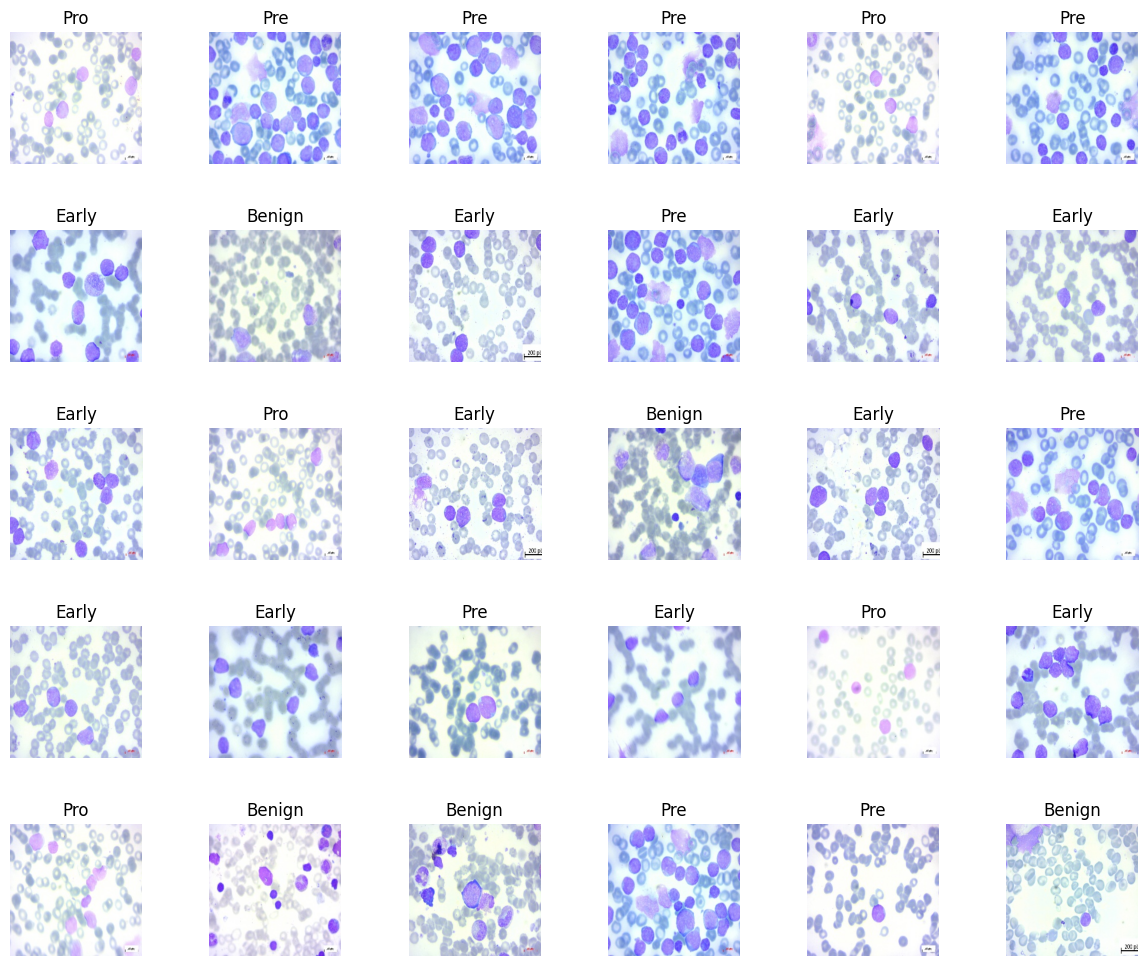

In [21]:
# Ruta a la carpeta que contiene las 4 subcarpetas con imágenes
ruta_directorio_original = '/kaggle/input/leukemia/Original'

# Inicializa una lista para almacenar nombres de archivos de todas las subcarpetas
nombres_archivos = []

# Itera sobre las subcarpetas y obtén los nombres de archivos
for subcarpeta in os.listdir(ruta_directorio_original):
    ruta_subcarpeta = os.path.join(ruta_directorio_original, subcarpeta)
    if os.path.isdir(ruta_subcarpeta):
        nombres_archivos.extend(os.listdir(ruta_subcarpeta))

# Asegúrate de que haya al menos 30 imágenes disponibles
if len(nombres_archivos) >= 30:
    # Selecciona al azar 30 imágenes de la lista
    imagenes_ejemplo = sample(nombres_archivos, 30)

# Configura el diseño de la figura
    filas, columnas = 5, 6
    figura, ejes = plt.subplots(filas, columnas, figsize=(15, 12))
    figura.subplots_adjust(hspace=0.5)

    # Itera sobre las imágenes de ejemplo y muéstralas en la cuadrícula
    for i, nombre_archivo in enumerate(imagenes_ejemplo):
        # Itera sobre las subcarpetas para encontrar la imagen
        for subcarpeta in os.listdir(ruta_directorio_original):
            ruta_subcarpeta = os.path.join(ruta_directorio_original, subcarpeta)
            ruta_imagen = os.path.join(ruta_subcarpeta, nombre_archivo)
            
            if os.path.isfile(ruta_imagen):
                imagen = cv.imread(ruta_imagen)
                imagen = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar con matplotlib
                ejes[i // columnas, i % columnas].imshow(imagen)
                ejes[i // columnas, i % columnas].axis('off')
                ejes[i // columnas, i % columnas].set_title(subcarpeta)
                break  # Rompe el bucle una vez que se encuentra la imagen

    plt.show()
else:
    print("No hay suficientes imágenes en las subcarpetas para mostrar 30 ejemplos.")

## Normalizacion y preprocesamiento

In [23]:

def preprocessor(image):
    # Applying normalization to the image
    image = cv.normalize(image, None, 0, 255, cv.NORM_MINMAX)    
    
    image = np.array(image)/255.0
    return image

## Data augmentation (albumentation)

In [31]:
def plot_multiple_img(img_matrix_list, title_list, ncols, main_title = ""):
    
    fig, axis = plt.subplots(figsize = (15, 8), nrows = 2, ncols = ncols, squeeze = False)
    fig.suptitle(main_title, fontsize = 18)
    fig.subplots_adjust(wspace = 0.3)
    fig.subplots_adjust(hspace = 0.3)
    
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        axis[i // ncols][i % ncols].imshow(img)
        axis[i // ncols][i % ncols].set_title(title, fontsize = 15)
        
    plt.show()

In [34]:
chosen_image = cv.imread("/kaggle/input/leukemia/Original") #TODO - Cambiar path

albumentation_list = [A.RandomFog(p = 1),A.VerticalFlip(p = 1), A.RandomBrightness(p = 1),A.RandomContrast(limit = 0.6, p = 1),
                      A.RandomCrop(p = 1,height = 224, width = 224),
                      A.Rotate(p = 1, limit = 90), A.RGBShift(p = 1)]

img_matrix_list = []
bboxes_list = []
for aug_type in albumentation_list:
    img = aug_type(image = chosen_image)['image']
    img_matrix_list.append(img)

img_matrix_list.insert(0,chosen_image)    

titles_list = ["Original", "RandomFog", "VerticalFlip", "RandomContrast", "RandomBrightness", "RandomCrop", "Rotate", "RGBShift"]

plot_multiple_img(img_matrix_list, titles_list, ncols = 4, main_title = "Different Types of Augmentations")

AttributeError: 'NoneType' object has no attribute 'shape'

In [36]:
# Creating data augmentation pipeline
augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(
        factor = (-.25, .3),
        fill_mode = 'reflect',
        interpolation = 'bilinear',
        ),


        tf.keras.layers.RandomBrightness(
        factor = (-.45, .45),
        value_range = (0.0, 1.0),
        ),

        tf.keras.layers.RandomContrast(
        factor = (.5),
        )
    ]
)

In [37]:
augmentation.build((None, 256, 256, 3)) # Building model
# Plotting model
tf.keras.utils.plot_model(augmentation,
                          show_shapes = True,
                          show_layer_names = True,
                          expand_nested = True)

OSError: [Errno 30] Read-only file system: 'model.png'

## Transformación de datos

## Análisis y Visualizaciones

--------

# Modelo predictivo

## Partición de datos

## Selección de atributos

## Estandarización / Normalización

## Modelado

## Evaluación del modelo

## Conclusión

## Almacenamiento de resultados